# SEIR Model

# Load Packages

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import utility as ut
from scipy.integrate import odeint
%run utility.py

# SEIR model 

In [2]:
def model(x:list, t:int, gamma:float, sigma:float, R0=1.5):
    S, E, I = x
    # New exposed people
    beta = R0 * gamma
    nE = beta * S * I
    # Derivatives (wrt times)
    dS = - nE
    dE = nE - sigma * E
    dI = sigma* E - gamma * I
    return dS, dE, dI

# System evolution

In [3]:
def solve_path(R0:float, ts:float, x_init:list, gamma:float, sigma:float):
    G = lambda x, t: model(x, t, gamma, sigma, R0)
    S_path, E_path, I_path = odeint(G, x_init, ts).transpose()
    C_path = 1 - S_path - E_path       # cumulative cases
    return I_path, C_path

# Plots

In [4]:
def plot_paths(paths:list, labels:list, times:list, who:str):
    fig, ax = plt.subplots()
    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)
    ax.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel(who)
    plt.show()

# Run SEIR

In [5]:
def runSEIR(N, gamma=0.1, sigma=1/5, t_length = 273, step = 273):
    I = 1/N
    E = 10* I
    S = 1 - I - E 
    x_0 = S,E,I
    ts = np.linspace(0, t_length, step)
    R0_vals = np.linspace(0.8, 3.0, 11)
    labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
    I_paths, C_paths = [], []
    
    for r in R0_vals:
        I_path, C_path = solve_path(r, ts, x_0, gamma, sigma)
        I_paths.append([int(round(N*i)) for i in I_path])
        C_paths.append([int(round(N*i)) for i in C_path])
    
    plot_paths(I_paths, labels, ts, 'I')
    plot_paths(C_paths, labels, ts, 'C')
    return  I_paths, C_paths


# Experiments

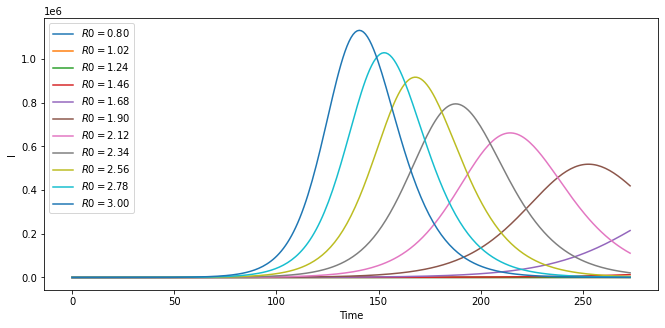

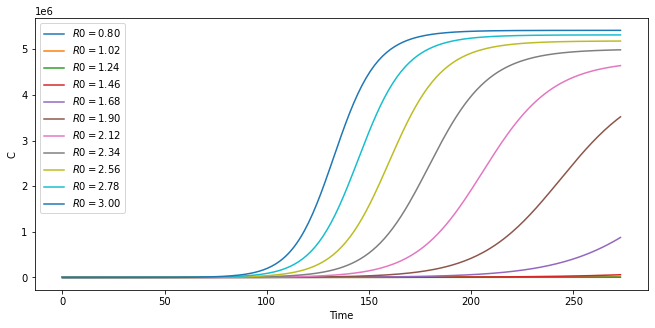

In [8]:
regionalCode = 12
pop = ut.popReg[str(regionalCode)]
I_paths, C_paths = runSEIR(pop, gamma=0.1, sigma=1/5, t_length = 273, step = 273)